# Coefficient of Determination (r<sup>2 </sup>)
In many cases, we have to know how strongly (or weakly) the best fit line fits the data. 

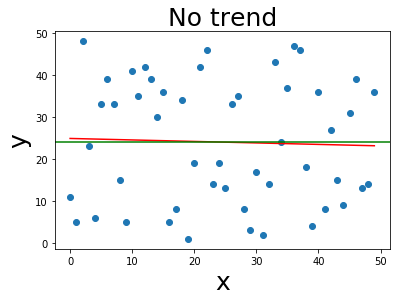

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,50)
y = np.random.randint(0,50, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("No trend",fontsize=25)
plt.scatter(x, y)

params = np.polyfit(x,y,1)
slope = params[0]
y_intercept = params[1]

y_hat = y_intercept+slope*x

# best fit line
plt.plot(x, y_hat, color="red")

# average y line (y_bar)
plt.axhline(y=np.mean(y), color = "green")

plt.show()

Notice that the data is relatively far away from the best fit line. Also note that the slope of the best fit line is very shallow suggesting that changes in x do not make a big change in y_hat. 

These observations suggest that x is most likely not a good predictor of y. 

We can quantify how strong the regression line fits the data using the coefficient of determination, also known as r<sup>2</sup>.

SSR  = **regression sum of squares** = Σ  (ŷ<sub>i</sub> - ȳ)<sup>2</sup>
* This is also known as the **explained sum of squares ** 

SSE  = **residuals sum of squares** = Σ  (y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup>
* This is also known as the **error sum of squares ** 

SST  = **total sum of squares** = Σ  (y<sub>i</sub> - ȳ<sub>i</sub>)<sup>2</sup>
* SST = SSR + SSE


![alt text](https://image.slidesharecdn.com/linearregression-140903114216-phpapp01/95/linear-regression-22-638.jpg?cb=1409744639)
[Source](https://image.slidesharecdn.com/linearregression-140903114216-phpapp01/95/linear-regression-22-638.jpg?cb=1409744639) 


Coefficient of Determination (r<sup>2</sup>) : 
** r<sup>2</sup> = 1 - (SSE / SSTO) **
* For simple linear regression only, r<sup>2</sup> = ** SSR / SSTO ** 
* The range of r<sup>2</sup> is between 0 and 1
* If r<sup>2</sup> is 1, then variation in y is *totally* accounted by the x-variable
    * All data lies perfectly on the best-fit line
* If r<sup>2</sup> is 0, then variation in y is *not at all* accounted by the x-variable
    * The regression line is horizontal 
* **Interpretation** 
    * "r<sup>2</sup> ×100 percent of the variation in y is 'explained by' the variation in predictor x."
        * Remember ***correlation does not imply causation***
    * "r<sup>2</sup> ×100 percent of the variation in y is reduced by taking into account predictor x"

Correlation Coefficient (r):
* Measure of the linear correlation between two variables, x and y
* r = +/- Sqrt(r<sup>2</sup>)
    * Sign depends on the slope of regression line
        * If the slope is positive, then r is positive.
        * If the slope is negative, then r is negative.
    * Range of r is between -1 and 1

### Explore
Find the r<sup>2</sup> for the data below. Calculate it manually using the formula given above. Then use the scipy method [lingress](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html), to check if you are correct. 

Then, mess around with the data to figure out how to get a lower r<sup>2</sup> value.  How would you get an r<sup>2</sup> value of exactly 1? Change the numbers in the green color. Don't actually change any of the methods. 

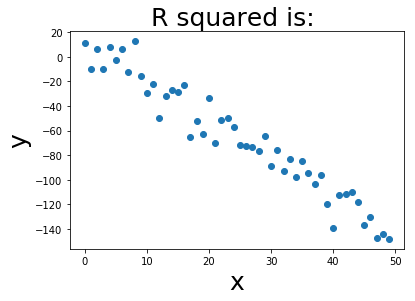

In [5]:
# You may need to pip install scipy
from scipy import stats

x = np.arange(0,50)
y = 10 - 3*x + np.random.normal(0, 10, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("R squared is: ",fontsize=25)
plt.scatter(x, y)
plt.show()

## Application of Regression in ML
Code source adapted from [SKLearn Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) 
Data source: [Car MPG Analysis](https://archive.ics.uci.edu/ml/datasets/auto+mpg) 

In [13]:
import pandas as pd
auto_data = pd.read_csv("auto_data.csv")
print(auto_data.head())
print()
print("The shape of the data is: " + str(auto_data.shape))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                         car name  
0          70       1  "chevrolet chevelle malibu"      
1          70       1          "buick skylark 320"      
2          70       1        "plymouth satellite"       
3          70       1              "amc rebel sst"      
4          70       1               "ford torino"       

The shape of the data is: (392, 9)


R squared value is: 0.57


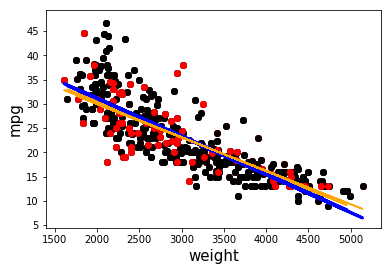

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
# Randomize and split our data
train, test = train_test_split(auto_data, test_size = 0.2)

train_x = (train.weight).values.reshape(-1,1)
train_y = (train.mpg).values.reshape(-1,1)

test_x = (test.weight).values.reshape(-1,1)
test_y = (test.mpg).values.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# print(train_x.shape)
# print(train_y.shape)

# Train the model
regr.fit(train_x, train_y)

plt.scatter(train_x, train_y,  color='black')
plt.scatter(test_x, test_y,  color='red')

# predicted best-fit line in blue
plt.plot(test_x, regr.predict(test_x), color='blue',
         linewidth=3)


# ___________________________________________________________________
# ACTUAL best-fit line for TEST data in orange
params = np.polyfit(test.weight,test.mpg,1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*test.weight

plt.plot(test.weight, y_hat, color="orange")
# ___________________________________________________________________



plt.xlabel("weight", fontsize=15)
plt.ylabel("mpg", fontsize=15)

print('R squared value is: %.2f' % r2_score(test_y, regr.predict(test_x)))
plt.show()


The blue line is the *estimated* best-fit line.
* Coefficients for the line are estimated from *training* data
* Then we predict y-values for the test x's using the model

The orange line is the *actual* best-fit line.
* Coefficients for the line are estimated from *testing* data
* Then we predict y-values for the test x's using the model

Maybe we were lucky. Let's repeat this many times to see what our average r<sup>2</sup> value is.


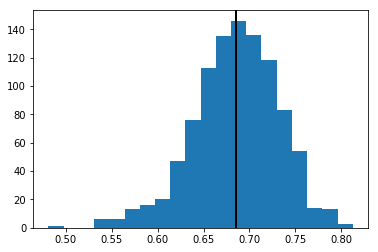

In [18]:
r2_values = []

for i in range(1000):
    train, test = train_test_split(auto_data, test_size = 0.2)

    train_x = (train.weight).values.reshape(-1,1)
    train_y = (train.mpg).values.reshape(-1,1)

    test_x = (test.weight).values.reshape(-1,1)
    test_y = (test.mpg).values.reshape(-1,1)
    
    regr = linear_model.LinearRegression()

    regr.fit(train_x, train_y)
    
    r2 = r2_score(test_y, regr.predict(test_x))
    r2_values.append(r2)
# print(r2_values)
r2_values =np.array(r2_values)
plt.hist(r2_values, bins=20)
plt.axvline(x=np.mean(r2_values), linewidth=2, color='k')



So overall, based on the relatively high r<sup>2</sup> value, we can say that weight is likely a good predictor of miles per gallon. 

But we can probably do better. With more predictors, we can use multi-variate regression to get higher prediction values. In reality, few values are dependent on one variable. There is usually more than 1 factor affecting the variation in a response variable. 